# 1. Setup

In [ ]:
# Install dependencies
!apt-get update
!apt-get upgrade

!apt-get install -y build-essential
!apt-get install -y cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev
!apt-get install -y libavcodec-dev libavformat-dev libswscale-d
!apt-get install -y libopencv-dev

!apt-get install -y g++-5
!apt-get install -y gcc-5

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [631 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,013 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,240 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 http://security.ub

In [ ]:
!/usr/local/cuda/bin/nvcc --version
# Check if GPU is selected as hardware accelerator
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if not '/device:GPU:0' in device_name:
    print('\nERROR: GPU is not selected as hardware accelerator!')
else:
    print(device_name)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
/device:GPU:0


In [ ]:
# Clone and compile darknet
!git clone https://github.com/AlexeyAB/darknet
%cd darknet

!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!make

Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Counting objects: 100% (294/294), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 15833 (delta 157), reused 219 (delta 140), pack-reused 15539
Receiving objects: 100% (15833/15833), 14.76 MiB | 8.31 MiB/s, done.
Resolving deltas: 100% (10587/10587), done.
/content/darknet
3rdparty	DarknetConfig.cmake.in	Dockerfile.cpu	       LICENSE	      scripts
build		darknet_images.py	Dockerfile.gpu	       Makefile       src
build.ps1	darknet.py		image_yolov3.sh        net_cam_v3.sh  vcpkg.json
cfg		darknet_video.py	image_yolov4.sh        net_cam_v4.sh  vcpkg.json.opencv23
cmake		data			include		       package.xml    video_yolov3.sh
CMakeLists.txt	docker-compose.yml	json_mjpeg_streams.sh  README.md      video_yolov4.sh
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-confi

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

!ls "/content/gdrive/My Drive/"

Mounted at /content/gdrive
 20211013_160651.jpg
 20211013_160917.jpg
 20220701_095252.jpg
 20230601_083127.jpg
'21-22 Fellowships.gdoc'
'21-22 Fellowships.pdf'
'AI Competency Transfer Request Sheet - Antonia Oprescu (amo78).gsheet'
 Antonia_Miruna_Oprescu_Research_Statement.pdf
 BLearner_Rebuttal.gdoc
'CDTE Camera Ready.gdoc'
'Colab Notebooks'
'Copy of ORIE 6746 Final Projects - slides.gslides'
'Copy of Robust and Agnostic Learning of Conditional Distributional Treatment Effects.gslides'
'CS5726 3.21.22.gjam'
'CS5726 Final'
'CS5726 OH - 2.7.22.gjam'
'CS5726 Prelims'
'CS5785 9.21.21.gjam'
'CS5785 9.24.21.gjam'
'CS5785 Final Project Team Matching.gsheet'
'CS5785 Final Project Team Matching - Teams.gsheet'
 CS5785_Math_Stats_Review_Session_Annotated.pdf
 CS5785_Math_Stats_Review_Session.pdf
'CS5785 Office Hours 10.5.21.gjam'
'CS5785 Office Hours 9.17.21.gjam'
'CS5785 Office Hours.gjam'
'CV_Antonia_Miruna_Oprescu (1).pdf'
 CV_Antonia_Miruna_Oprescu.pdf
'Fall 2021 PhD Orientation.gslides'
 

In [ ]:
# Create a symlink
!ln -s "/content/gdrive/My Drive/object-detection/" "/content/object-detection"

In [ ]:
!apt-get install dos2unix

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 384 kB of archives.
After this operation, 1,367 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 dos2unix amd64 7.4.2-2 [384 kB]
Fetched 384 kB in 0s (778 kB/s)
Selecting previously unselected package dos2unix.
(Reading database ... 123423 files and directories currently installed.)
Preparing to unpack .../dos2unix_7.4.2-2_amd64.deb ...
Unpacking dos2unix (7.4.2-2) ...
Setting up dos2unix (7.4.2-2) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!dos2unix /content/object-detection/object.names

dos2unix: converting file /content/object-detection/object.names to Unix format...


# 2. Train

In [ ]:
# Start a new training for VOC
!./darknet detector train /content/object-detection/trainer.data /content/object-detection/yolov2-voc.cfg /content/object-detection/darknet19_448.conv.23 -dont_show

 CUDA-version: 11080 (12000), GPU count: 1  
 OpenCV version: 4.5.4
yolov2-voc
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 8, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 0.001 BF
   8 conv    256       3 x 3/ 1     52 x  52 x

OR

In [ ]:
# Continue training
!./darknet detector train /content/object-detection/trainer.data /content/object-detection/yolov2-voc.cfg /content/object-detection/backup/yolov2-voc_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
Region Avg IOU: 0.866485, Class: 1.000000, Obj: 0.853294, No Obj: 0.007758, Avg Recall: 1.000000,  count: 18
3087/80200: loss=0.1 hours left=81.4
 3087: 0.069693, 0.092886 avg loss, 0.001000 rate, 3.122922 seconds, 197568 images, 81.355350 hours left
Loaded: 0.000062 seconds
Region Avg IOU: 0.864960, Class: 1.000000, Obj: 0.830439, No Obj: 0.006278, Avg Recall: 1.000000,  count: 20
Region Avg IOU: 0.839795, Class: 1.000000, Obj: 0.795749, No Obj: 0.007710, Avg Recall: 0.954545,  count: 22
Region Avg IOU: 0.889473, Class: 1.000000, Obj: 0.856403, No Obj: 0.007649, Avg Recall: 1.000000,  count: 21
Region Avg IOU: 0.850908, Class: 1.000000, Obj: 0.818118, No Obj: 0.006567, Avg Recall: 0.950000,  count: 20
Region Avg IOU: 0.873166, Class: 1.000000, Obj: 0.861691, No Obj: 0.007017, Avg Recall: 1.000000,  count: 20
Region Avg IOU: 0.866677, Class: 1.000000, Obj: 0.886844, No Obj: 0.006833, Avg Recall: 1.000000,  count: 17
Region Avg IOU: 0.

# 3. Test

In [ ]:
!ls /content/object-detection

backup		       object.names  trainer.data			  yolov2-voc.cfg
darknet19_448.conv.23  raw_data      train.txt				  yolov3-tiny.cfg
darknet53.conv.74      test.txt      Virtual_FOV_frame_0_conf_0_it_0.jpg


In [ ]:
# Run the detector
!./darknet detector test /content/object-detection/trainer.data /content/object-detection/yolov2-voc.cfg /content/object-detection/backup/yolov2-voc_last.weights /content/object-detection/raw_data/Virtual_FOV_frame_19_conf_2_it_1.jpg -dont_show

 CUDA-version: 11080 (12000), GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 0.001 BF
   8 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52

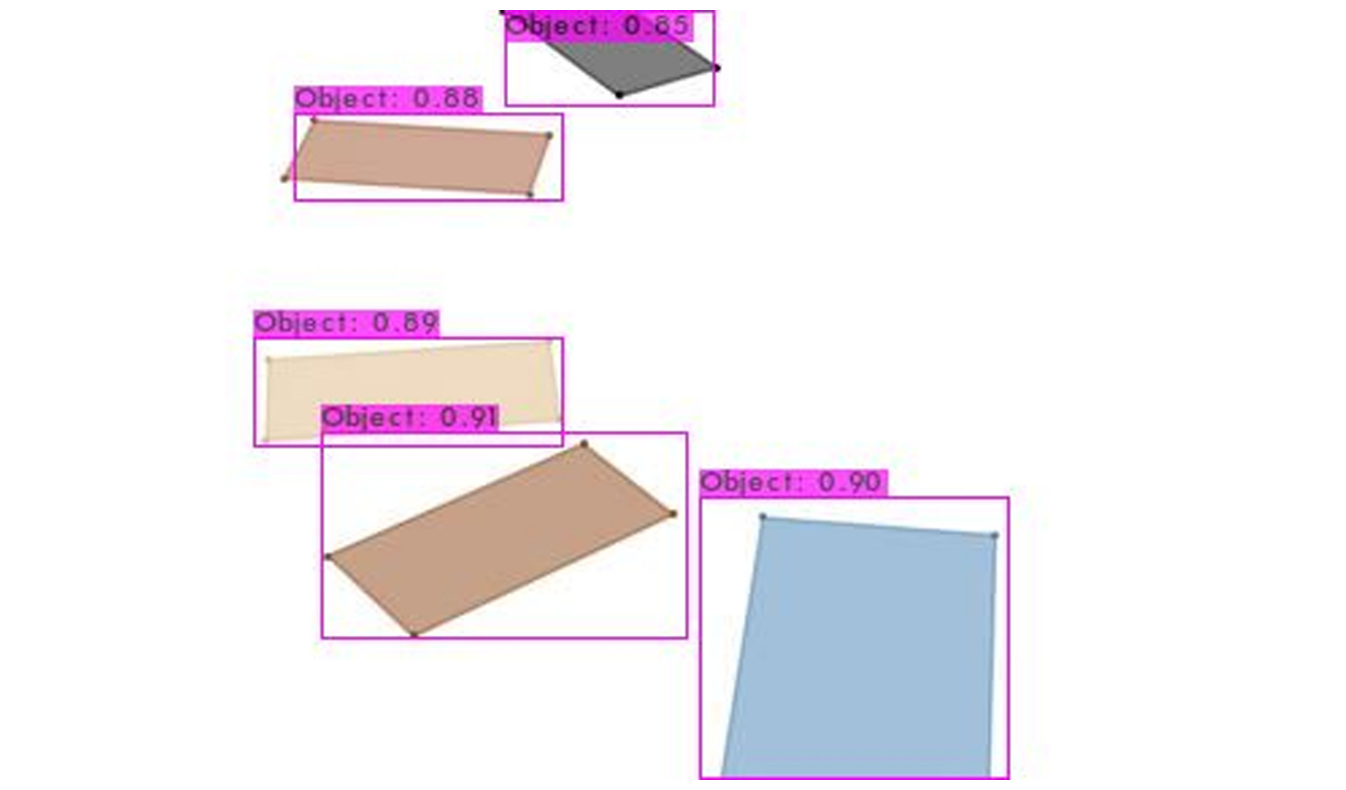

In [ ]:
# Show the generated image
def detect(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

detect('predictions.jpg')

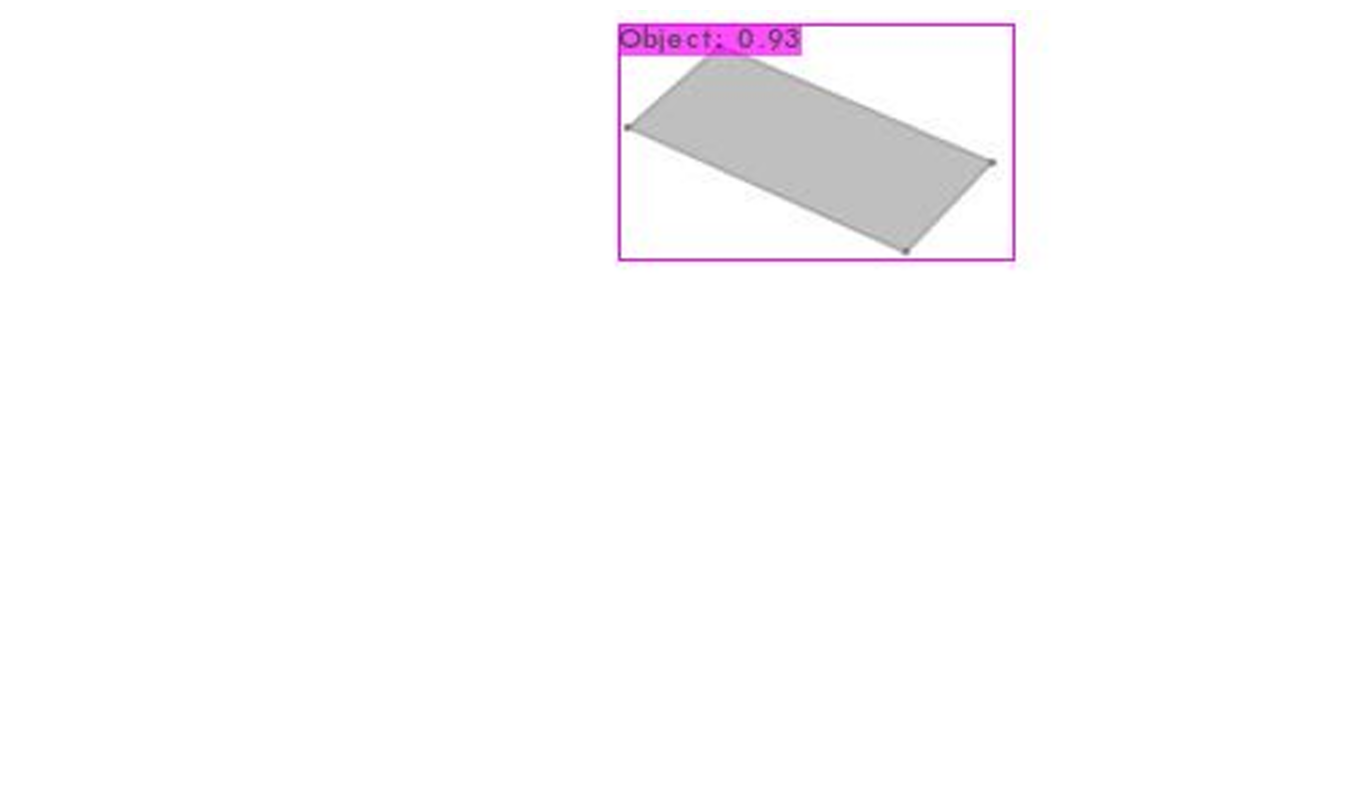

In [ ]:
# Show the generated image
def detect(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

detect('predictions.jpg')

In [ ]:
# Run the detector
!./darknet detector test /content/object-detection/trainer.data /content/object-detection/yolov3-tiny.cfg /content/object-detection/backup/yolov3-tiny_last.weights /content/object-detection/test.jpg -dont_show

 CUDA-version: 11080 (12000), GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26